(60000, 28, 28)

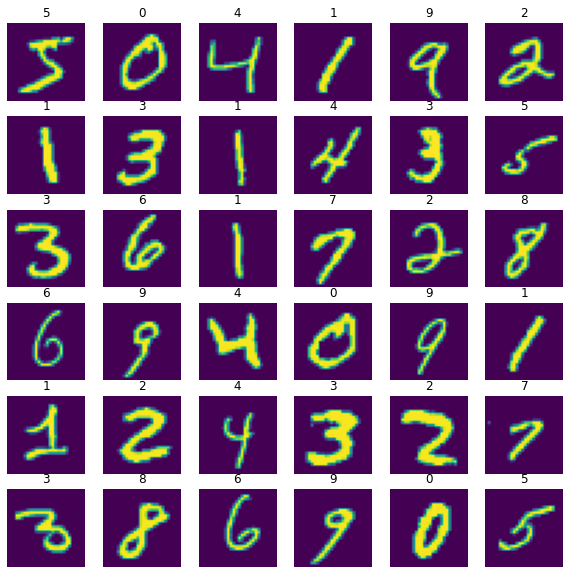

In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt

class_names = ['0','1','2','3','4','5','6','7','8','9']
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

plt.figure(figsize=(10, 10))
for i in range(36):
    ax = plt.subplot(6,6,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])    
    plt.axis("off")  
    
x_train.shape

In [2]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(len(class_names))
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

hist = model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2914 - sparse_categorical_accuracy: 0.9173 - val_loss: 0.1598 - val_sparse_categorical_accuracy: 0.9530
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1307 - sparse_categorical_accuracy: 0.9615 - val_loss: 0.1158 - val_sparse_categorical_accuracy: 0.9661
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0904 - sparse_categorical_accuracy: 0.9729 - val_loss: 0.1048 - val_sparse_categorical_accuracy: 0.9690
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0661 - sparse_categorical_accuracy: 0.9804 - val_loss: 0.0963 - val_sparse_categorical_accuracy: 0.9707
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0520 - sparse_categorical_accuracy: 0.9842 - val_loss: 0.0872 - val_sparse_categorical_accuracy: 0.9749
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0406 - spars

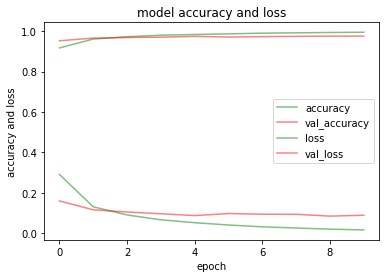

In [4]:
plt.plot(hist.history['sparse_categorical_accuracy'], 'g', alpha = 0.5, label = 'accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], 'r', alpha = 0.5, label = 'val_accuracy')
plt.plot(hist.history['loss'], 'g', alpha = 0.5,  label = 'loss')
plt.plot(hist.history['val_loss'], 'r', alpha = 0.5,  label = 'val_loss')
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", round(score[0],2))
print("Test accuracy:", round(score[1],2))

# model.save('mnist_model.h5')

Test loss: 0.08
Test accuracy: 0.98


# Predication with Model and Visulization of Results

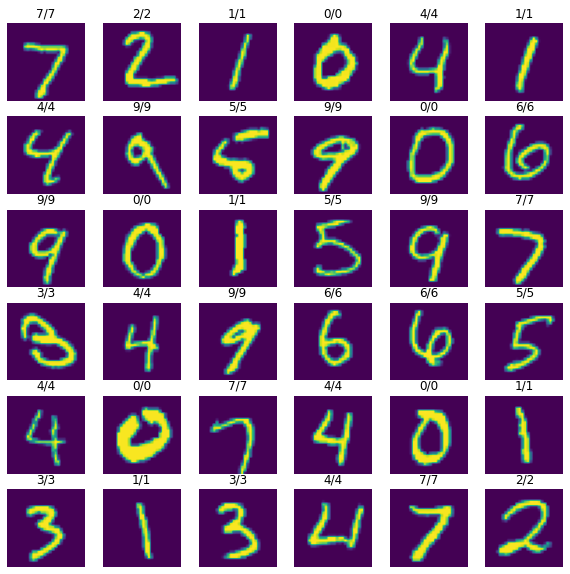

In [6]:
import numpy as np

# model = keras.models.load_model('mnist_model.h5')
predictions = model.predict(x_test)

plt.figure(figsize=(10, 10))
for i in range(36):
    ax = plt.subplot(6,6,i+1)
    plt.imshow(x_test[i])
    plt.title(class_names[np.argmax(predictions[i])]+'/'+class_names[y_test[i]])
    plt.axis("off") 
    
# 98%